# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### Структура данных:

- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### План работы:

1. Изучить файл с данными.
2. Разбить данные на три выборки: обучающая, валидационная и тестовая.
3. Исследовать три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
4. Найти оптимальные параметры для каждой модели и выбрать одну из них для обучения модели.
5. Оценить точность обученной модели.
6. Оценить адекватность модели.

## 1. Откройте и изучите файл

Подключение библиотек.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

Открытие файла.

In [2]:
tariff_data = pd.read_csv('/datasets/users_behavior.csv')
tariff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
tariff_data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Вывод по шагу 1.

Перед нами стоит задача классификации. За целевой признак берем столбец is_ultra. Остальные признаки помогут нам предсказывать решение по столбцу is_ultra.

Данных не очень много, модель может быть немного переобученной.

## 2. Разбейте данные на выборки

Разобьем выборку по принципу 60/20/20.

In [4]:
train_tariff_data, vnt_tariff_data = train_test_split(tariff_data, test_size=0.40, random_state=23042020)
valid_tariff_data, test_tariff_data = train_test_split(vnt_tariff_data, test_size=0.50, random_state=23042020)

print('Размер тренериующей выборки', train_tariff_data.shape[0])
print('Размер валидационной выборки', valid_tariff_data.shape[0])
print('Размер тестовой выборки', test_tariff_data.shape[0])

Размер тренериующей выборки 1928
Размер валидационной выборки 643
Размер тестовой выборки 643


Составим таблицы признаков и целового признака для каждого дата фрейма.

In [5]:
train_tariff_data_features = train_tariff_data.drop(['is_ultra'], axis=1)
train_tariff_data_target = train_tariff_data['is_ultra']
valid_tariff_data_features = valid_tariff_data.drop(['is_ultra'], axis=1)
valid_tariff_data_target = valid_tariff_data['is_ultra']
test_tariff_data_features = test_tariff_data.drop(['is_ultra'], axis=1)
test_tariff_data_target = test_tariff_data['is_ultra']

### Вывод по шагу 2

Данные были разбиты по принципу 60/20/20.

- Обучение пройдет на данных train_tariff_data
- Валидация модели на данных valid_tariff_data
- Лучшая модель по валидации будет применена на данных test_tariff_data

## 3. Исследуйте модели

Начнем с Дерева выбора. Изменим в цикле гиперпараметр max_depth.

In [6]:
%%time

best_depth = 0
best_accuracy = 0

for depth in range(1,101):
    model = DecisionTreeClassifier(random_state=23042020, max_depth=depth)
    model.fit(train_tariff_data_features, train_tariff_data_target)
    valid_predictions = model.predict(valid_tariff_data_features)
    accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
    print('Глубина дерева', depth,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

print('Лучшая глубина дерева', best_depth,'Лучшая точность', best_accuracy)        

Глубина дерева 1 Точность 0.7527216174183515
Глубина дерева 2 Точность 0.7853810264385692
Глубина дерева 3 Точность 0.7931570762052877
Глубина дерева 4 Точность 0.7884914463452566
Глубина дерева 5 Точность 0.80248833592535
Глубина дерева 6 Точность 0.807153965785381
Глубина дерева 7 Точность 0.8040435458786936
Глубина дерева 8 Точность 0.8180404354587869
Глубина дерева 9 Точность 0.8118195956454122
Глубина дерева 10 Точность 0.7947122861586314
Глубина дерева 11 Точность 0.7962674961119751
Глубина дерева 12 Точность 0.7807153965785381
Глубина дерева 13 Точность 0.7807153965785381
Глубина дерева 14 Точность 0.7651632970451011
Глубина дерева 15 Точность 0.7651632970451011
Глубина дерева 16 Точность 0.7682737169517885
Глубина дерева 17 Точность 0.7589424572317263
Глубина дерева 18 Точность 0.7542768273716952
Глубина дерева 19 Точность 0.7573872472783826
Глубина дерева 20 Точность 0.76049766718507
Глубина дерева 21 Точность 0.7558320373250389
Глубина дерева 22 Точность 0.7371695178849145
Гл

<font color='green'>Можно было увеличить шаг для перебора, при увеличении глубины дерева на 1, качество почти не меняется. </font>


Лучший показатель при глубине дерева 8.

In [7]:
%%time

best_tree_model = DecisionTreeClassifier(random_state=23042020, max_depth=8)
best_tree_model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = best_tree_model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.8180404354587869
CPU times: user 14.5 ms, sys: 91 µs, total: 14.6 ms
Wall time: 13.3 ms


Настроим гиперпараметр criterion с gini на entropy.

In [8]:
model = DecisionTreeClassifier(random_state=23042020, max_depth=8, criterion="entropy")
model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = best_tree_model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.8180404354587869


Гиперпараметр gini показывает себя лучше. Изменим splitter с best на random.

In [9]:
model = DecisionTreeClassifier(random_state=23042020, max_depth=8, splitter='random')
model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = best_tree_model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.8180404354587869


Гиперпараметр best работает лучше. Перейдем к оценке случайного леса. Изменим в цикле гиперпараметр n_estimators.

In [10]:
%%time

best_estim = 0
best_accuracy = 0

for estim in range(1,101):
    model = RandomForestClassifier(random_state=23042020, n_estimators=estim)
    model.fit(train_tariff_data_features, train_tariff_data_target)
    valid_predictions = model.predict(valid_tariff_data_features)
    accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
    print('Количество деревьев', estim,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшая количество деревьев', best_estim,'Лучшая точность', best_accuracy)        

Количество деревьев 1 Точность 0.7153965785381027
Количество деревьев 2 Точность 0.776049766718507
Количество деревьев 3 Точность 0.749611197511664
Количество деревьев 4 Точность 0.7838258164852255
Количество деревьев 5 Точность 0.76049766718507
Количество деревьев 6 Точность 0.7884914463452566
Количество деревьев 7 Точность 0.7947122861586314
Количество деревьев 8 Точность 0.7993779160186625
Количество деревьев 9 Точность 0.7978227060653188
Количество деревьев 10 Точность 0.7962674961119751
Количество деревьев 11 Точность 0.7993779160186625
Количество деревьев 12 Точность 0.7962674961119751
Количество деревьев 13 Точность 0.7869362363919129
Количество деревьев 14 Точность 0.7978227060653188
Количество деревьев 15 Точность 0.7931570762052877
Количество деревьев 16 Точность 0.7993779160186625
Количество деревьев 17 Точность 0.8040435458786936
Количество деревьев 18 Точность 0.8102643856920684
Количество деревьев 19 Точность 0.8087091757387247
Количество деревьев 20 Точность 0.8087091757

Лучший показатель точности при количестве деревьев 18.

In [11]:
%%time

best_forest_model = RandomForestClassifier(random_state=23042020, n_estimators=18)
best_forest_model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = best_forest_model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Количество деревьев', 18,'Точность',accuracy)

Количество деревьев 18 Точность 0.8102643856920684
CPU times: user 140 ms, sys: 12 µs, total: 140 ms
Wall time: 976 ms


Настроим гиперпараметр criterion с gini на entropy.

In [12]:
model = RandomForestClassifier(random_state=23042020, n_estimators=18, criterion='entropy')
model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.7978227060653188


Гиперпараметр gini показывает себя лучше. Изменим bootstrap с True на Flase.

In [13]:
model = RandomForestClassifier(random_state=23042020, n_estimators=18, bootstrap=False)
model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.776049766718507


bootstrap с True показывает себя лучше. Изменим warm_start с False на True.

In [14]:
model = RandomForestClassifier(random_state=23042020, n_estimators=18, warm_start=True)
model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.8102643856920684


Значения не изменились. Перейдем к логистической регрессии. Изменим гипер параметр max_iter в цикле.

In [15]:
%%time

best_max_iter = 0
best_accuracy = 0

for max_iter in range(1,201):
    model = LogisticRegression(random_state=23042020, max_iter=max_iter)
    model.fit(train_tariff_data_features, train_tariff_data_target)
    valid_predictions = model.predict(valid_tariff_data_features)
    accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
    print('Количество итерраций', max_iter,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшая количество итерраций', best_max_iter,'Лучшая точность', best_accuracy)        

Количество итерраций 1 Точность 0.7013996889580093
Количество итерраций 2 Точность 0.7013996889580093
Количество итерраций 3 Точность 0.7013996889580093
Количество итерраций 4 Точность 0.7013996889580093
Количество итерраций 5 Точность 0.7013996889580093
Количество итерраций 6 Точность 0.7013996889580093
Количество итерраций 7 Точность 0.7013996889580093
Количество итерраций 8 Точность 0.7045101088646968
Количество итерраций 9 Точность 0.7045101088646968
Количество итерраций 10 Точность 0.7060653188180405
Количество итерраций 11 Точность 0.7045101088646968
Количество итерраций 12 Точность 0.7060653188180405
Количество итерраций 13 Точность 0.7045101088646968
Количество итерраций 14 Точность 0.7076205287713841
Количество итерраций 15 Точность 0.7076205287713841
Количество итерраций 16 Точность 0.7045101088646968
Количество итерраций 17 Точность 0.7045101088646968
Количество итерраций 18 Точность 0.7060653188180405
Количество итерраций 19 Точность 0.7060653188180405
Количество итерраций 

Количество итерраций 158 Точность 0.7620528771384136
Количество итерраций 159 Точность 0.7620528771384136
Количество итерраций 160 Точность 0.7620528771384136
Количество итерраций 161 Точность 0.7620528771384136
Количество итерраций 162 Точность 0.7620528771384136
Количество итерраций 163 Точность 0.7620528771384136
Количество итерраций 164 Точность 0.7620528771384136
Количество итерраций 165 Точность 0.7620528771384136
Количество итерраций 166 Точность 0.7620528771384136
Количество итерраций 167 Точность 0.7620528771384136
Количество итерраций 168 Точность 0.7620528771384136
Количество итерраций 169 Точность 0.7620528771384136
Количество итерраций 170 Точность 0.7620528771384136
Количество итерраций 171 Точность 0.7620528771384136
Количество итерраций 172 Точность 0.7620528771384136
Количество итерраций 173 Точность 0.7620528771384136
Количество итерраций 174 Точность 0.7620528771384136
Количество итерраций 175 Точность 0.7620528771384136
Количество итерраций 176 Точность 0.7620528771

In [16]:
%%time

best_reg_model = LogisticRegression(random_state=23042020)
best_reg_model.fit(train_tariff_data_features, train_tariff_data_target)
valid_predictions = best_reg_model.predict(valid_tariff_data_features)
accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
print('Количество итерраций', 100,'Точность',accuracy)

Количество итерраций 100 Точность 0.7620528771384136
CPU times: user 22 ms, sys: 3.97 ms, total: 25.9 ms
Wall time: 101 ms


Значение по-умолчанию в max_iter=100 хорошее. Как и у 97, 98 и 99 итераций. Увеличение в большую сторону ничего не меняет. Изменим другой гиперпараметр solver.

In [17]:
%%time

best_solver = ''
best_accuracy = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model = LogisticRegression(random_state=23042020, solver=solve)
    model.fit(train_tariff_data_features, train_tariff_data_target)
    valid_predictions = model.predict(valid_tariff_data_features)
    accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
    print('Solver', solve,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_solver= solve
        best_accuracy = accuracy

print('Лучший solver', best_solver,'Лучшая точность', best_accuracy) 

Solver newton-cg Точность 0.7667185069984448
Solver sag Точность 0.7013996889580093
Solver lbfgs Точность 0.7667185069984448
Solver saga Точность 0.7013996889580093
Solver liblinear Точность 0.7620528771384136
Лучший solver newton-cg Лучшая точность 0.7667185069984448
CPU times: user 351 ms, sys: 69 µs, total: 351 ms
Wall time: 1.99 s


Лучшим solver является lbfgs, который стоит по-умолчанию. На равне с ним newton-cg. Изменим в цикле гиперпараметр С.

In [18]:
%%time

best_C = 0.0
best_accuracy = 0

for float_c in [x/10 for x in range(1,21)]:
    model = LogisticRegression(random_state=23042020, C=float_c)
    model.fit(train_tariff_data_features, train_tariff_data_target)
    valid_predictions = model.predict(valid_tariff_data_features)
    accuracy = accuracy_score(valid_tariff_data_target, valid_predictions)
    print('C=', float_c,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_C= float_c
        best_accuracy = accuracy

print('Лучший C', best_C,'Лучшая точность', best_accuracy) 

C= 0.1 Точность 0.7573872472783826
C= 0.2 Точность 0.7573872472783826
C= 0.3 Точность 0.76049766718507
C= 0.4 Точность 0.7620528771384136
C= 0.5 Точность 0.7620528771384136
C= 0.6 Точность 0.7620528771384136
C= 0.7 Точность 0.7620528771384136
C= 0.8 Точность 0.7620528771384136
C= 0.9 Точность 0.7620528771384136
C= 1.0 Точность 0.7620528771384136
C= 1.1 Точность 0.7620528771384136
C= 1.2 Точность 0.7620528771384136
C= 1.3 Точность 0.7620528771384136
C= 1.4 Точность 0.7620528771384136
C= 1.5 Точность 0.7620528771384136
C= 1.6 Точность 0.7620528771384136
C= 1.7 Точность 0.7620528771384136
C= 1.8 Точность 0.7620528771384136
C= 1.9 Точность 0.7620528771384136
C= 2.0 Точность 0.7620528771384136
Лучший C 0.4 Лучшая точность 0.7620528771384136
CPU times: user 444 ms, sys: 4.19 ms, total: 448 ms
Wall time: 2.78 s


Значение по умолчанию C=1 показывает лучший результат.

### Вывод по шагу 3

В ходе исследования были получены следующие данные:

- Точность модели решающего дерева при глубине 8 равна 0.818. Время выполнения код и обучения 0,013 секунд.
- Точность модели случайного леса при количестве деревьев 18 равна 0.81. Время выполнения код и обучения 0,115 секунд.
- Точность модели логистической регресии равна 0.762. Время выполнения код и обучения 0,101 секунд.

Так как выборка небольшая, то лучший результат показывает решающее древо с гиперпараметром max_depth=8.

## 4. Проверьте модель на тестовой выборке

Оценим точность каждой модели на тестовой выборке.

In [19]:
test_predictions = best_tree_model.predict(test_tariff_data_features)
accuracy = accuracy_score(test_tariff_data_target, test_predictions)
print('Точность модели решающего леса на тестовой выборке',accuracy)

test_predictions = best_forest_model.predict(test_tariff_data_features)
accuracy = accuracy_score(test_tariff_data_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке',accuracy)

test_predictions = best_reg_model.predict(test_tariff_data_features)
accuracy = accuracy_score(test_tariff_data_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке',accuracy)

Точность модели решающего леса на тестовой выборке 0.749611197511664
Точность модели случайного леса на тестовой выборке 0.7822706065318819
Точность модели логистической регресиии на тестовой выборке 0.7107309486780715


### Вывод по шагу 4

Для решения поставленной задачи можно выбрать модель решающего леса с поправкой, что точность 0.75 достигается округлением до сотых значения 0.749611197511664. Учитывая разницу между текущей точностью и точностью на валидационной выборке, можно сделать вывод слабой переобученности модели.

Для 100% гарантий и при учете того, что выборка не будет большой, рекомендую использовать модель случайного леса. Показатель выше требуемого на 3 пункта.

## 5. (бонус) Проверьте модели на адекватность

Оценить адекватность модели можно используя несколько метрик:

- accuracy - точность совпадения прогнозов с правильными ответами.
- precision - отношение правильно предсказанных классов равных 1(TP) к сумме правильно предсказанных классов равных 1(TP) с неправльными предсказаниями, указанные как 1(FP).
- recall - отношение правильно предсказанных классов равных 1(TP) к сумме правильно предсказанных классов равных 1(TP) с неправльными предсказаниями, указанные как 0(FN).

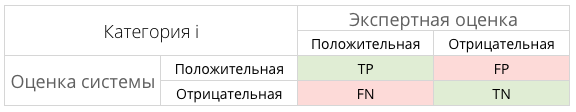

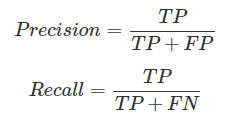

In [20]:
test_predictions = best_forest_model.predict(test_tariff_data_features)
accuracy = accuracy_score(test_tariff_data_target, test_predictions)
precision = precision_score(test_tariff_data_target, test_predictions)
recall = recall_score(test_tariff_data_target, test_predictions)
print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.7822706065318819 Precision = 0.7430555555555556 Recall = 0.5095238095238095


Для оценки адеватности используется F-мера - среднее гармоническое между precision и recall. Если хотя бы один из параметров близок к нулю, то и F-мера стремится к 0. Если оба стремятся к 1, то F-мера тоже стремится к 1.

In [21]:
f_score = f1_score(test_tariff_data_target, test_predictions)
print('F-мера =', f_score)

F-мера = 0.6045197740112994


### Вывод по шагу 5

Адекватность модели оценивается по нескольким параметрам. Для модели классификации это accuracy, precision и recall. Качество модели лучше всего отражают precision и recall и эти метрики складываются в F-мера как единую оценку модели.

Модель получилась среднего качества. И для таких задач она адекватна.

## Итоговый вывод

В ходе проделанной работы было выполнено:

1. Изучен файл с данными.
2. Разбиты данные на три выборки: обучающая, валидационная и тестовая.
3. Исследованы три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
4. Найдены оптимальные параметры для каждой модели и выбрана одна из них для обучения модели.
5. Оценена точность обученной модели.
6. Оценена адекватность модели.

Для обучения модели было использована выборка в 2000 значений. Этого может быть недостаточно для повышения ключевых параметров модели классификатора. Увеличение в 10 или 100 увеличит accuracy, precision и recall, а также время обучения.

Адекватность модели повышается с ростом количества значений.